### Step 1: Importing Necessary Libraries

This step involves importing essential libraries to facilitate the development of the churn prediction model:  

- **pandas**: Used for data manipulation and analysis, including handling datasets.  
- **numpy**: Provides support for numerical operations and handling arrays.  
- **matplotlib** and **seaborn**: Utilized for data visualization to uncover patterns and insights in the dataset.  
- **warnings**: Used to suppress unnecessary warnings, ensuring cleaner outputs during the development process.  

These libraries form the foundation for data preprocessing, exploration, and visualization in the model-building workflow.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 2: Loading the Dataset

The dataset was loaded into a pandas DataFrame for analysis. The dataset file, `Churn_Modelling.csv`, contains the necessary information to predict customer churn.

#### Key Points:
- The dataset includes features such as customer demographics, account information, and churn labels.
- **pandas** was used to read the CSV file, ensuring easy manipulation and exploration of the data.

This step is crucial for initiating the data preprocessing and exploratory analysis phases.


In [ ]:
df=pd.read_csv("/content/Churn_Modelling.csv")

### Step 3: Displaying the First Few Rows of the Dataset

The first few rows of the dataset were displayed to understand its structure and contents. This provides a quick overview of the data, including:  

- **Feature names**: Columns in the dataset, such as customer demographics and account details.  
- **Sample data**: A snapshot of the values within the dataset.  

This step helps in verifying that the dataset has been loaded correctly and in identifying the types of data available for analysis.


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Step 4: Dropping Irrelevant Columns

Unnecessary columns were removed from the dataset to streamline the analysis and model training process. Specifically, the first three columns were dropped as they were not relevant to predicting customer churn.  

#### Key Points:
- **Column selection**: Columns like IDs or other identifiers that do not contribute to the prediction were excluded.  
- **Axis specification**: The operation was performed along the column axis.  

This step ensures that only meaningful features are retained for further analysis and model building.


In [ ]:
df=df.drop(df.columns[[0,1,2]],axis=1)

### Step 5: Checking the Dataset Dimensions

The shape of the dataset was checked to determine the number of rows and columns after dropping irrelevant features.  

#### Key Insights:
- **Rows**: Represent the number of data points (customers) in the dataset.  
- **Columns**: Represent the number of features available for analysis.  

This step helps in confirming the structure of the dataset and ensuring the correct features are retained for the next stages of preprocessing and modeling.


In [ ]:
df.shape

(10000, 11)

### Step 6: Examining Dataset Information

The dataset's structure and details were reviewed to understand the types of data it contains and identify any potential issues.  

#### Key Details:
- **Feature types**: Displays whether each column contains integers, floats, or objects (categorical data).  
- **Non-null values**: Helps identify missing data in the dataset.  
- **Memory usage**: Indicates the amount of memory the dataset occupies.  

This step provides a comprehensive overview of the dataset, laying the groundwork for data cleaning and preprocessing.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Step 7: Converting Object Data Types to Category

All columns with an object data type were converted to the **category** data type.  

#### Reasons for Conversion:
- **Memory optimization**: The category data type reduces memory usage compared to object type.  
- **Efficient processing**: Categorical data allows for faster computations and is ideal for encoding in machine learning workflows.  

This step ensures better resource utilization and prepares the categorical data for preprocessing and encoding in subsequent steps.


In [ ]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i]=df[i].astype('category')

### Step 8: Descriptive Statistics of the Dataset

The statistical summary of numerical columns in the dataset was generated to understand the data distribution.  

#### Key Metrics:
- **Count**: Number of non-missing values in each column.  
- **Mean**: Average value of the feature.  
- **Standard Deviation**: Measure of data spread.  
- **Minimum and Maximum**: Range of values in each column.  
- **Percentiles (25%, 50%, 75%)**: Help identify the distribution of data.  

This step provides insights into the central tendency, variability, and range of the numerical data, guiding the next steps in data preprocessing.


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Step 9: Checking for Missing Values

The number of missing (null) values in each column was checked to assess the completeness of the dataset.  

#### Key Insights:
- **Null count**: Displays how many missing values exist in each feature.  
- **Data quality**: Identifying missing data helps determine if any imputation or removal of rows/columns is necessary before model training.  

This step ensures that the dataset is free from missing values or prepares it for necessary data imputation or cleaning steps.


In [ ]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


### Step 10: Checking for Duplicates

The number of duplicate rows in the dataset was checked to ensure data integrity.  

#### Key Insights:
- **Duplicate count**: Displays how many rows in the dataset are exact duplicates of others.  
- **Data quality**: Identifying duplicates is crucial to prevent bias or overfitting during model training.  

This step helps ensure that the dataset contains unique data points for accurate predictions.


In [ ]:
df.duplicated().sum()

0

### Step 11: Visualizing the Distribution of 'Tenure' for Exited and Non-Exited Customers

A histogram was plotted to visualize the distribution of the 'Tenure' feature for customers who have exited (churned) versus those who have not.  

#### Key Insights:
- **Comparison**: The histogram compares the tenure of customers who exited (`Exited == 1`) with those who did not (`Exited == 0`).  
- **Color coding**: Green represents customers who did not exit, and red represents customers who exited.  
- **Purpose**: This helps in understanding how tenure relates to customer churn, providing a foundation for further analysis and feature selection.  

This step visually explores the relationship between customer tenure and the likelihood of churn.


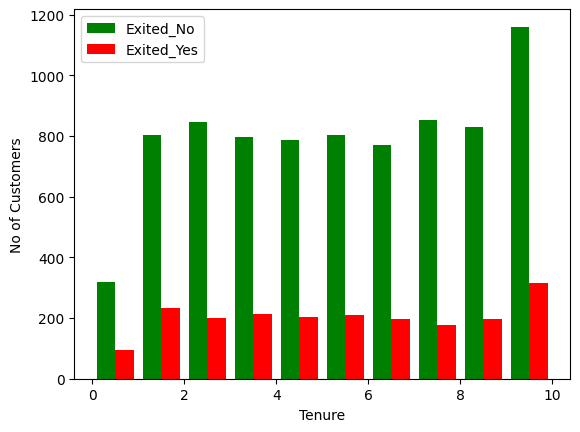

In [ ]:
Exited_No=df[df.Exited == 0].Tenure
Exited_Yes=df[df.Exited == 1].Tenure
plt.hist([Exited_No,Exited_Yes],color=['green','red'],label=['Exited_No','Exited_Yes'])
plt.xlabel('Tenure')
plt.ylabel('No of Customers')
plt.legend()
plt.show()

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Step 12: Dropping Irrelevant Columns for Categorical Data

Certain columns were dropped from the dataset to focus on relevant categorical features. Specifically, columns with indices 0, 3, 5, and 9 were removed.  

#### Reason for Dropping:
- **Irrelevant features**: Columns that do not contribute meaningfully to the prediction of customer churn were excluded. This helps in simplifying the model and reducing noise.  
- **Focus on categorical data**: The remaining dataset will consist of the categorical features that are most relevant for further encoding and model training.  

This step ensures that only the pertinent categorical variables are retained for analysis and encoding in the churn prediction model.


In [ ]:
df_cat=df.drop(df.columns[[0,3,5,9]],axis=1)

### Step 13: Encoding Categorical Variables

The categorical variables **'Geography'** and **'Gender'** were encoded using **Label Encoding**.  

#### Key Insights:
- **Label Encoding**: Converts categorical values into numerical labels. For example, 'Geography' and 'Gender' values are transformed into integers.
- **`fit_transform()` method**: First fits the encoder to the unique values in the column, then transforms the values into corresponding numerical labels.

This step prepares the categorical variables for use in machine learning models, which typically require numerical inputs.


In [ ]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df_cat['Geography']=Le.fit_transform(df_cat['Geography'])
df_cat['Gender']=Le.fit_transform(df_cat['Gender'])

In [ ]:
df_cat.head()

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,0,0,2,1,1,1,1
1,2,0,1,1,0,1,0
2,0,0,8,3,1,0,1
3,0,0,1,2,0,0,0
4,2,0,2,1,1,1,0


### Step 14: Dropping Irrelevant Columns for Continuous Data

Certain columns were dropped from the dataset to focus on the relevant continuous features. Specifically, columns with indices 1, 2, 4, 6, 7, 8, and 10 were removed.

#### Reason for Dropping:
- **Irrelevant features**: These columns were not useful for predicting customer churn, so they were excluded.
- **Focus on continuous data**: The remaining dataset consists of continuous variables that will be used for further processing and model building.

This step helps in retaining only the necessary continuous features, ensuring a more streamlined and efficient dataset for model training.


In [ ]:
df_cont=df.drop(df.columns[[1,2,4,6,7,8,10]],axis=1)

### Step 15: Standardizing Continuous Data

The continuous features were standardized using **StandardScaler** to ensure that all features have the same scale, which is crucial for many machine learning algorithms.  

#### Key Insights:
- **StandardScaler**: This scaler standardizes the features by removing the mean and scaling to unit variance. It transforms the data to have a mean of 0 and a standard deviation of 1.
- **`fit_transform()` method**: First fits the scaler to the data, then transforms the data to standardized values.
- **Result**: The transformed data is stored in a DataFrame with the same column names as the original dataset.

Standardizing the data ensures that no feature dominates due to scale differences, which is especially important for algorithms like Neural Networks.


In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
SS_X = sc.fit_transform(df_cont)
SS_X = pd.DataFrame(SS_X, columns=df_cont.columns)
SS_X.head()



,CreditScore,Age,Balance,EstimatedSalary
0,-0.326221,0.293517,-1.225848,0.021886
1,-0.440036,0.198164,0.117350,0.216534
2,-1.536794,0.293517,1.333053,0.240687
3,0.501521,0.007457,-1.225848,-0.108918
4,2.063884,0.388871,0.785728,-0.365276


### Step 16: Combining Standardized and Categorical Data

The standardized continuous features (`SS_X`) were concatenated with the encoded categorical features (`df_cat`) to form the final dataset, `df_new`.  

#### Key Insights:
- **Concatenation**: The continuous and categorical datasets are merged along the column axis (`axis=1`), creating a unified dataset ready for model training.
- **Final Dataset**: `df_new` contains both the scaled continuous variables and the transformed categorical variables, ensuring that all features are in the correct format for machine learning.

This step prepares the final dataset by combining the preprocessed continuous and categorical features for the model.


In [ ]:
df_new=pd.concat([SS_X,df_cat],axis=1)

In [ ]:
df_new.isnull().sum()

,0
CreditScore,0
Age,0
Balance,0
EstimatedSalary,0
Geography,0
Gender,0
Tenure,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0


### Step 17: Splitting the Dataset into Features and Target

The dataset was split into two parts: the feature set (`X`) and the target variable (`Y`).  

#### Key Insights:
- **`X` (Features)**: The first 9 columns (indexed 0 to 8) were selected as the feature set, containing all the input variables that will be used to predict customer churn.
- **`Y` (Target)**: The last column (indexed -1) was selected as the target variable, which represents whether a customer has exited (churned) or not.

This step separates the data into features and the target, preparing it for the model training process.


In [ ]:
X=df_new.iloc[:,0:9]
Y=df_new.iloc[:,-1]

### Step 18: Splitting the Data into Training and Testing Sets

The dataset was split into training and testing sets to evaluate the performance of the churn prediction model.  

#### Key Insights:
- **`train_test_split()`**: This function splits the data into training and testing sets. 80% of the data is used for training, and 20% is reserved for testing.
- **`random_state=0`**: Ensures reproducibility of the split, so the same data points are assigned to the training and testing sets each time the code is run.
- **Training Set (`X_train`, `y_train`)**: Used to train the model.
- **Testing Set (`X_test`, `y_test`)**: Used to evaluate the model's performance.

This step prepares the data for training the model and testing its accuracy on unseen data.


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [ ]:
X_train.shape

(8000, 9)

In [ ]:
X_test.shape

(2000, 9)

In [ ]:
y_test.shape

(2000,)

In [ ]:
y_train.shape

(8000,)

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

### Step 19: Importing Libraries for Building the Neural Network Model

Necessary libraries from **Keras** were imported to build and configure the artificial neural network (ANN).  

#### Key Insights:
- **`Sequential`**: This class is used to initialize the neural network model, where layers are added sequentially.
- **Layers**: Various layers were imported for building the ANN:
  - **`Dense`**: Fully connected layers, which are the main building blocks of the network.
  - **Activation Functions**:
    - **`LeakyReLU`, `PReLU`, `ELU`, `ReLU`**: Different activation functions used to introduce non-linearity in the network.
  - **`Dropout`**: A regularization technique to prevent overfitting by randomly dropping neurons during training.

These components are crucial for defining the architecture of the neural network model.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout


In [ ]:
#Lets initialize the ANN'
classifier = Sequential()

In [ ]:
#Adding the input layer
classifier.add(Dense(units = 11,activation='relu'))

In [ ]:
#Adding first hidden layer
classifier.add(Dense(units = 7,activation='relu'))

In [ ]:
#Adding second hidden layer
classifier.add(Dense(units = 6,activation='relu'))

In [ ]:
#Adding output layer
classifier.add(Dense(units = 1,activation='sigmoid'))

In [ ]:
#Compile
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Step 20: Training the Neural Network Model

The neural network model was trained using the training data, and validation was performed on a subset of the training data.

#### Key Insights:
- **`fit()` method**: This trains the model using the provided training data (`X_train`, `y_train`) and updates the model's weights to minimize the loss.
- **`validation_split=0.33`**: 33% of the training data was reserved for validation, allowing the model's performance to be evaluated during training and helping monitor overfitting.
- **`batch_size=10`**: The model is trained in batches of 10 samples at a time.
- **`epochs=100`**: The model will be trained for 100 iterations over the entire training dataset.

This step initiates the model training and stores the training history for later evaluation of the model's performance.


In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8001 - loss: 0.5108 - val_accuracy: 0.7955 - val_loss: 0.4625
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7951 - loss: 0.4493 - val_accuracy: 0.7940 - val_loss: 0.4521
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7930 - loss: 0.4484 - val_accuracy: 0.7936 - val_loss: 0.4473
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8016 - loss: 0.4369 - val_accuracy: 0.7974 - val_loss: 0.4442
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8026 - loss: 0.4330 - val_accuracy: 0.8008 - val_loss: 0.4431
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7892 - loss: 0.4504 - val_accuracy: 0.7989 - val_loss: 0.4439
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7947 - loss: 0.4376 - val_accuracy: 0.8042 - val_loss: 0.4408
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7993 - loss: 0.4366 - val_accu

### Step 21: Implementing Early Stopping Callback

An **EarlyStopping** callback was defined to monitor the validation loss during training and prevent overfitting by stopping the training process if the model's performance does not improve for a certain number of epochs.

#### Key Insights:
- **`monitor='val_loss'`**: The validation loss is monitored during training to evaluate the model's performance on unseen data.
- **`patience=20`**: The training will stop if there is no improvement in validation loss for 20 consecutive epochs.
- **`verbose=1`**: Provides a message when training stops early.
- **`mode='max'`**: The training will stop when the validation loss has not improved (i.e., stopped decreasing).
- **`min_delta=0.0001`**: A minimum change required to qualify as an improvement in validation loss.

This step helps in saving time and computational resources by stopping training early if the model is no longer improving.


In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val loss',patience=20,verbose=1,mode='max',baseline=None,restore_best_weights=False,min_delta=0.0001)

### Step 22: Training the Model with Early Stopping

The neural network model was trained again with the EarlyStopping callback integrated, allowing the training process to stop early if the validation loss does not improve.

#### Key Insights:
- **`callbacks=early_stopping`**: The EarlyStopping callback was added to monitor the validation loss during training. If the loss doesn't improve for 20 consecutive epochs, training will stop early.
- **Training Parameters**: Same as before:
  - **`validation_split=0.33`**: 33% of the training data is used for validation.
  - **`batch_size=10`**: The model trains on 10 samples at a time.
  - **`epochs=100`**: The model is set to train for up to 100 epochs.

This step ensures efficient model training, stopping early to avoid overfitting when no further improvement is observed.


In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8524 - loss: 0.3446 - val_accuracy: 0.8402 - val_loss: 0.3839
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8610 - loss: 0.3244 - val_accuracy: 0.8425 - val_loss: 0.3756
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8545 - loss: 0.3444 - val_accuracy: 0.8421 - val_loss: 0.3776
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8560 - loss: 0.3360 - val_accuracy: 0.8357 - val_loss: 0.3960
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8531 - loss: 0.3431 - val_accuracy: 0.8376 - val_loss: 0.3803
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8645 - loss: 0.3306 - val_accuracy: 0.8440 - val_loss: 0.3740
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8580 - loss: 0.3306 - val_accuracy: 0.8466 - val_loss: 0.3761
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8571 - loss: 0.3374 - val_accu

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Step 23: Plotting Model Accuracy

A plot of the training and validation accuracy over epochs was generated to visualize the model's performance during training.

#### Key Insights:
- **Training Accuracy**: Represents how well the model performs on the training data.
- **Validation Accuracy**: Indicates how well the model generalizes to unseen data (validation set).
- **Plot Interpretation**: The plot helps in identifying if the model is overfitting (when the training accuracy increases but the validation accuracy plateaus or decreases).

This step allows you to visually assess the model's learning behavior, ensuring that it is not overfitting and is generalizing well to new data.


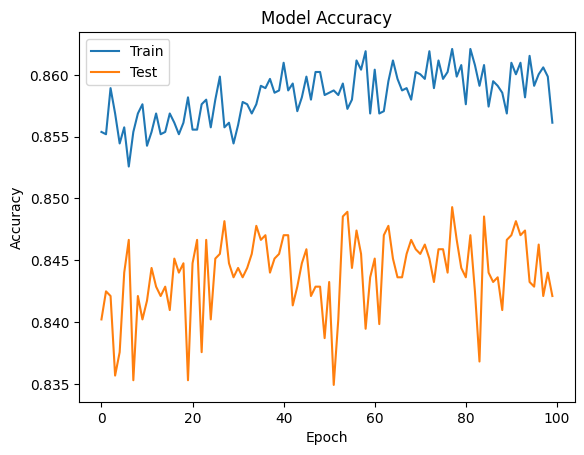

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [ ]:
#predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1491,  104],
       [ 205,  200]])

In [ ]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8455

In [ ]:
#get the weights
weights = classifier.get_weights()
weights

[array([[-0.73584735,  0.05913354,  0.04017045, -0.48212424, -0.06577775,
          0.04818181,  0.05849957, -0.09347294,  0.5720057 ,  0.04797436,
         -0.5968827 ],
        [ 0.34007514, -0.00744941, -0.13642025,  0.5814773 , -0.07751001,
         -0.87006456, -0.0900695 , -0.98671794, -0.54440814,  0.6361521 ,
         -0.36485052],
        [ 1.0992244 ,  0.5023596 ,  0.50106865,  0.50103027, -0.9481271 ,
          0.14829183,  1.0494242 ,  0.65108263,  0.8273277 , -0.00423265,
          0.05484981],
        [-0.8033827 ,  0.10950838,  0.33199075, -0.07474822, -0.3343676 ,
         -0.06499007,  0.1790807 , -0.1002854 ,  0.40918878,  0.11475743,
         -0.23666021],
        [-0.14934044,  0.02867219, -0.23756684, -0.6549899 , -0.07798595,
         -0.3831705 ,  0.9749271 ,  0.66379505, -0.20729733,  0.1512018 ,
         -1.69133   ],
        [ 0.2159261 , -0.03625247,  0.39247593,  0.6954286 , -0.51223356,
          0.33973393, -0.11300422,  0.5579935 , -0.14215921,  0.1871741

In [ ]:
import pickle
filename = 'ann_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))